In [25]:
import pandas as pd
import numpy as np
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen
# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [45]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

In [26]:
clean=pd.read_csv('data/covid_19_clean_complete.csv')

In [49]:
country_wise=pd.read_csv('data/country_wise_latest.csv')

In [27]:
day_wise=pd.read_csv('data/day_wise.csv')

In [28]:
grouped=pd.read_csv('data/full_grouped.csv')

In [29]:
usa_country_wise=pd.read_csv('data/usa_county_wise.csv')

In [30]:
worldometer=pd.read_csv('data/worldometer_data.csv')

In [31]:
clean.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [113]:
country_wise.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [32]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [35]:
grouped['Date'] = pd.to_datetime(grouped['Date'])

In [11]:
#no null values in df1,df2,df3,df4,

In [36]:
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

In [37]:
usa_country_wise = usa_country_wise.replace('', np.nan).fillna(0)

In [38]:
worldometer = worldometer.replace('', np.nan).fillna(0)

In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [41]:
temp=day_wise[['Date','Deaths', 'Recovered', 'Active']]

In [42]:
temp=temp.melt(id_vars='Date', value_vars=['Deaths', 'Recovered', 'Active'])

In [43]:
temp

Date variable    value
0   2020-01-22   Deaths       17
1   2020-01-23   Deaths       18
2   2020-01-24   Deaths       26
3   2020-01-25   Deaths       42
4   2020-01-26   Deaths       56
..         ...      ...      ...
559 2020-07-23   Active  6166006
560 2020-07-24   Active  6212290
561 2020-07-25   Active  6243930
562 2020-07-26   Active  6309711
563 2020-07-27   Active  6358362

[564 rows x 3 columns]

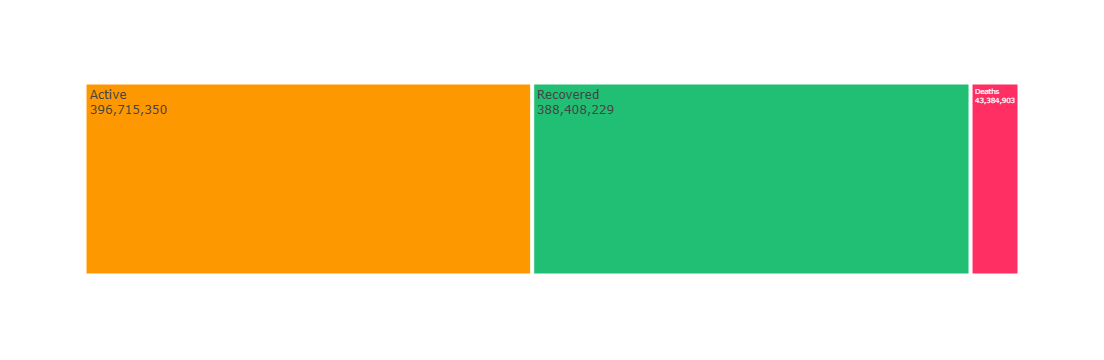

In [46]:
fig = px.treemap(temp, path=["variable"], values="value", height=225, 
                 color_discrete_sequence=[act, rec, dth])
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [57]:
def plot_map(df, col, pal):
    df=df[df[col]>0]
    fig=px.choropleth(df, locations='Country/Region',locationmode='country names', color=col, hover_name="Country/Region", title=col, hover_data=[col], color_continuous_scale=pal)
    fig.show()

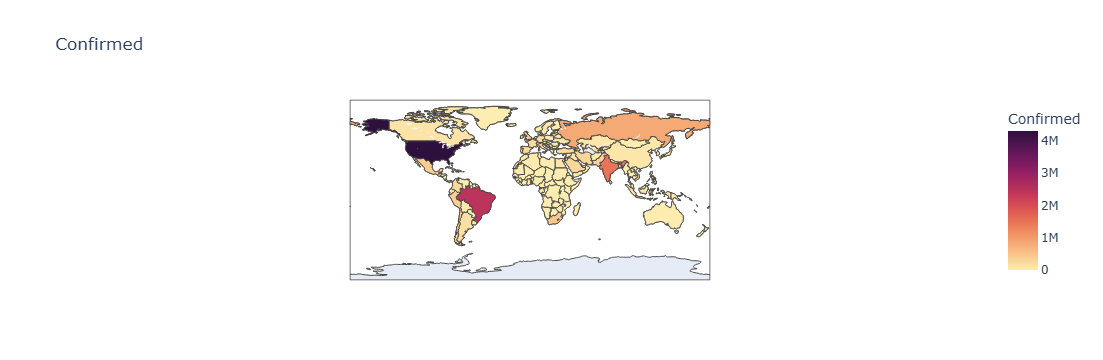

In [58]:
plot_map(country_wise,'Confirmed','matter')

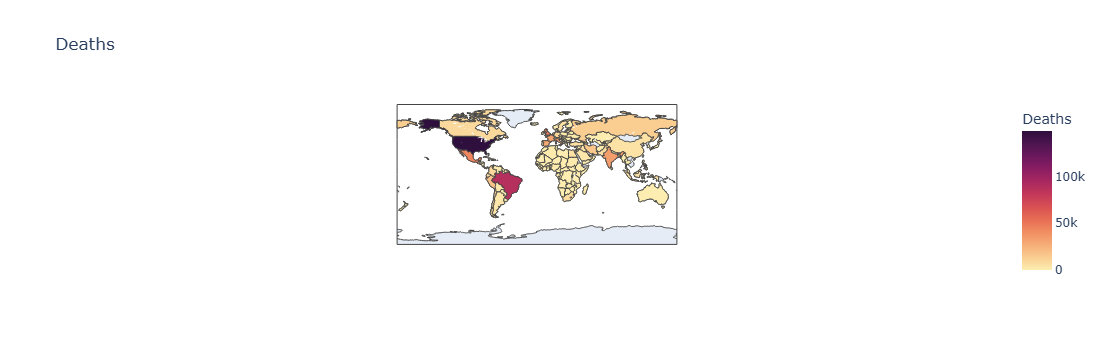

In [59]:
plot_map(country_wise,'Deaths','matter')

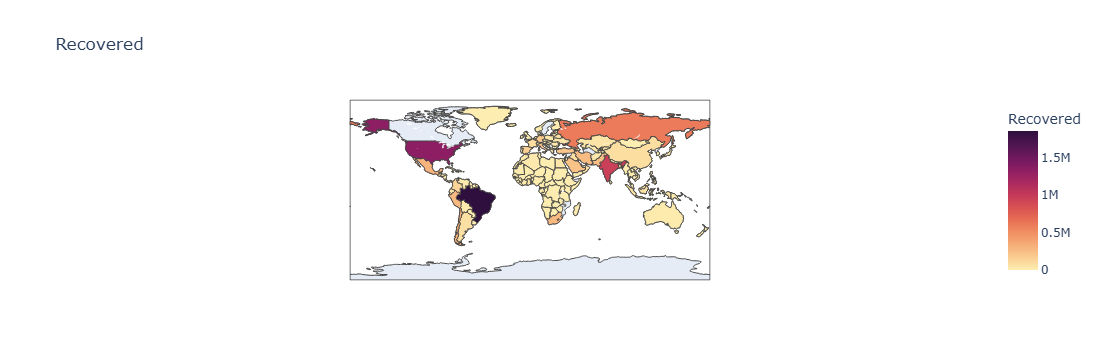

In [60]:
plot_map(country_wise,'Recovered','matter')

In [61]:
#cases overtime

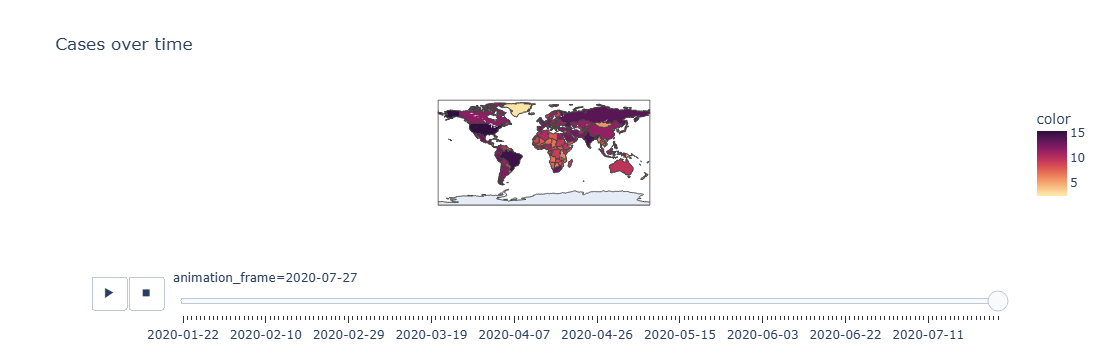

In [66]:
# Over the time

fig = px.choropleth(grouped, locations="Country/Region", 
                    color=np.log(grouped["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.matter)
#fig.update(layout_coloraxis_showscale=False)
fig.show()

In [78]:
def plot_daywise(col, hue):
    fig = px.bar(day_wise, x="Date", y=col, width=1000, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

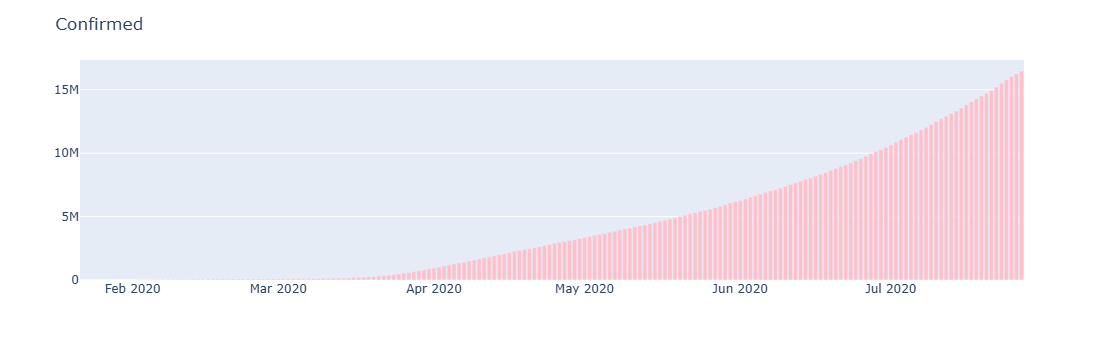

In [79]:
plot_daywise('Confirmed','pink')

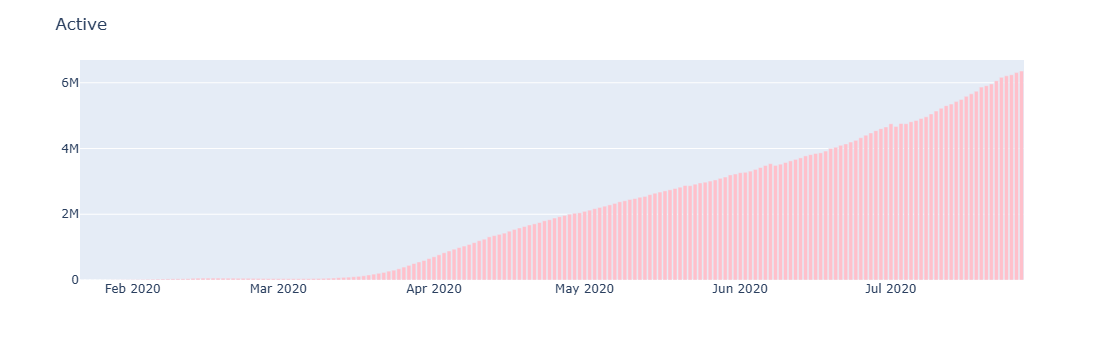

In [85]:
plot_daywise('Active', 'pink')

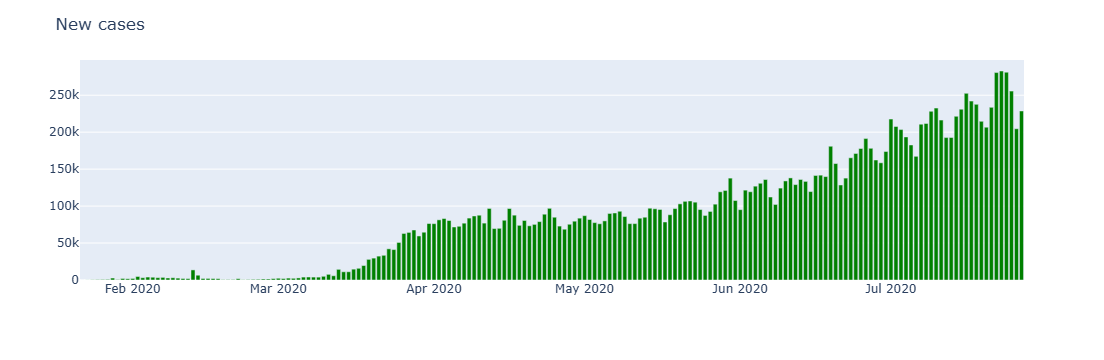

In [87]:
plot_daywise('New cases', 'green')

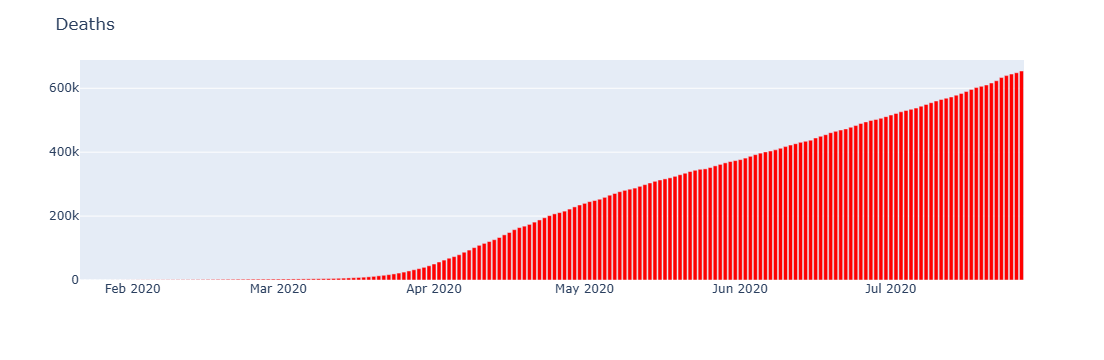

In [88]:
plot_daywise('Deaths', 'Red')

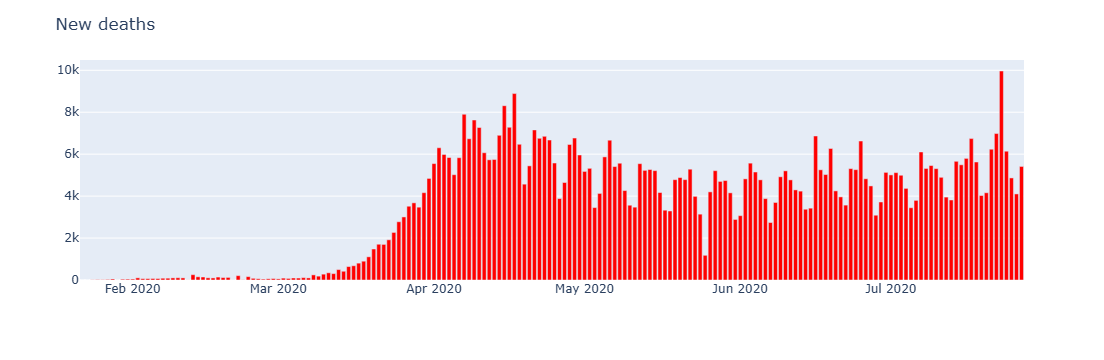

In [90]:
plot_daywise('New deaths', 'red')

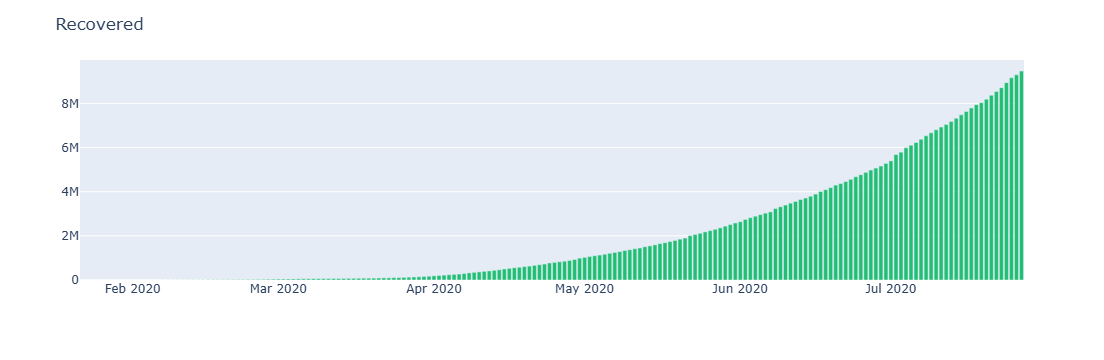

In [91]:
plot_daywise('Recovered', rec)

In [82]:
def plot_daywise_line(col, hue):
    fig = px.line(day_wise, x="Date", y=col, width=1000, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

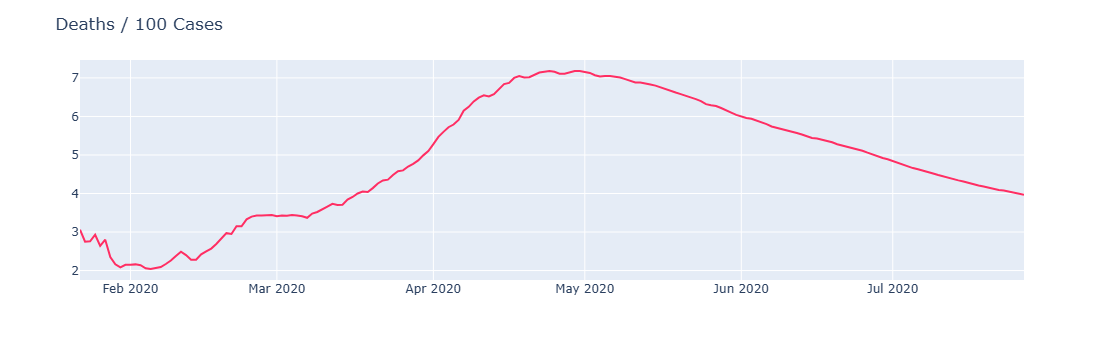

In [84]:
plot_daywise_line('Deaths / 100 Cases', dth)

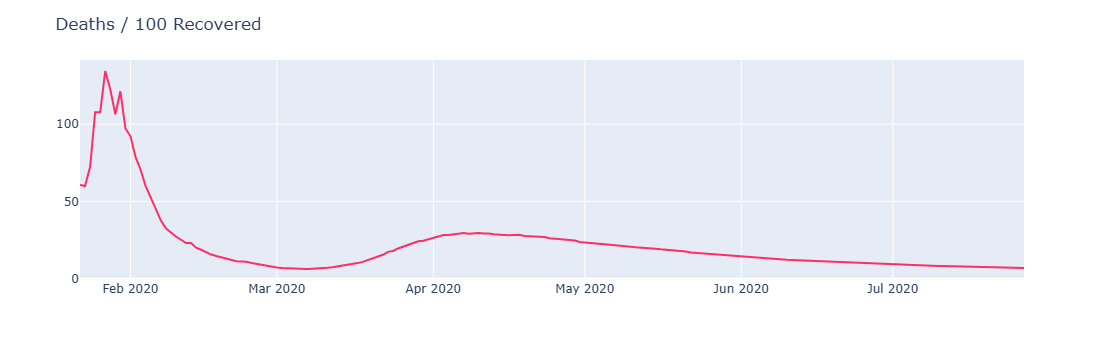

In [92]:
plot_daywise_line('Deaths / 100 Recovered', dth)

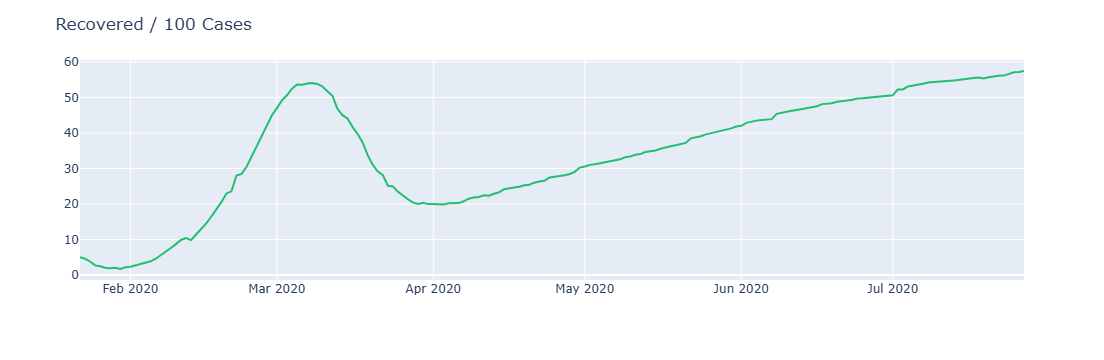

In [93]:
plot_daywise_line('Recovered / 100 Cases', rec)

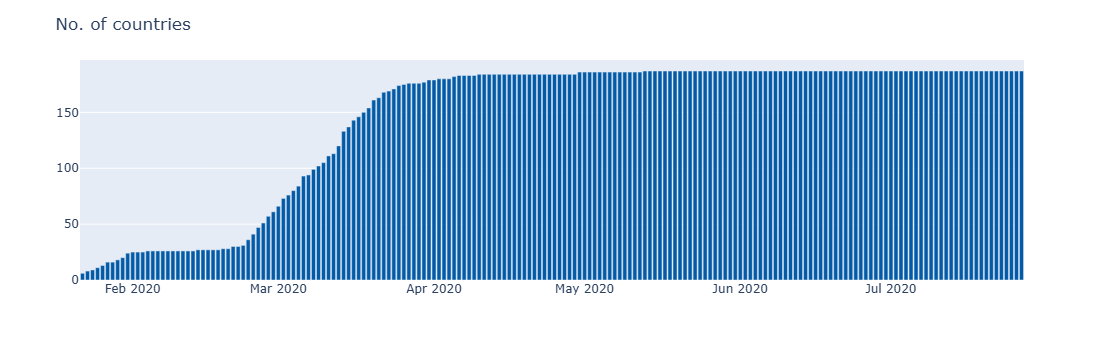

In [94]:
plot_daywise('No. of countries', '#035aa6')

In [95]:
temp = day_wise[['Date', 'Recovered', 'Active']]

In [96]:
temp.head()

Date  Recovered  Active
0 2020-01-22         28     510
1 2020-01-23         30     606
2 2020-01-24         36     879
3 2020-01-25         39    1353
4 2020-01-26         52    2010

In [98]:
temp=temp.melt(id_vars='Date', value_vars=['Date', 'Recovered', 'Active'], var_name='Variables', value_name='Count')

In [99]:
temp

Date  Variables    Count
0   2020-01-22  Recovered       28
1   2020-01-23  Recovered       30
2   2020-01-24  Recovered       36
3   2020-01-25  Recovered       39
4   2020-01-26  Recovered       52
..         ...        ...      ...
371 2020-07-23     Active  6166006
372 2020-07-24     Active  6212290
373 2020-07-25     Active  6243930
374 2020-07-26     Active  6309711
375 2020-07-27     Active  6358362

[376 rows x 3 columns]

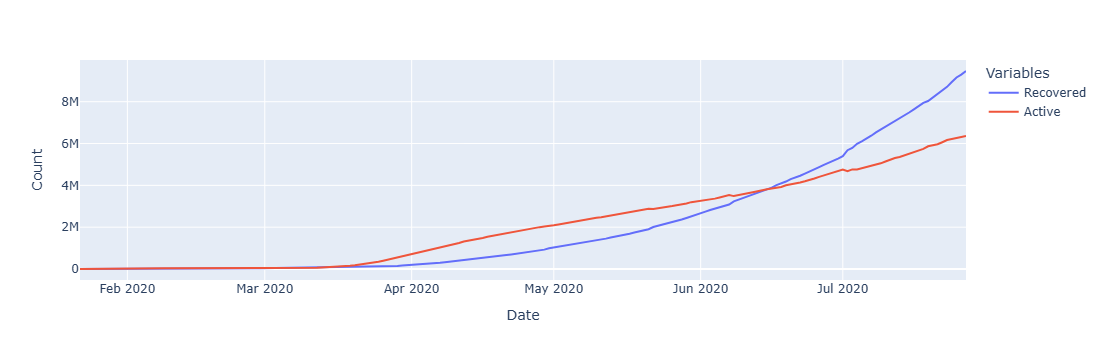

In [101]:
px.line(temp, x='Date', y='Count', color='Variables')

In [102]:
#top 20 countries

In [107]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=1000, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

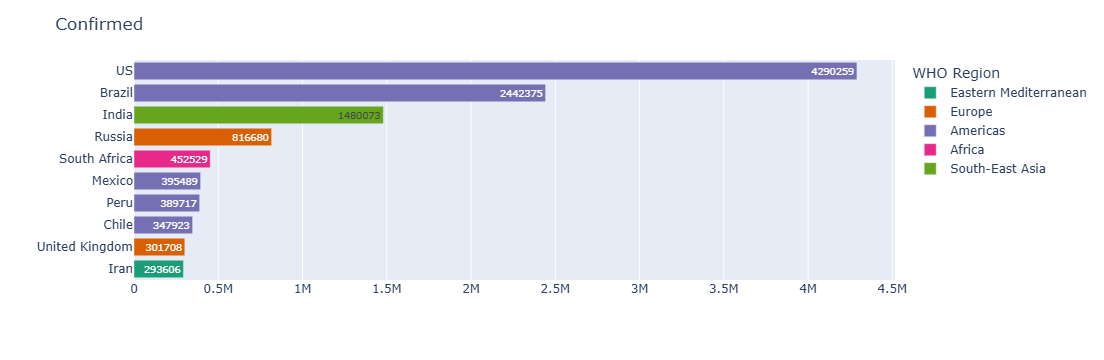

In [110]:
plot_hbar(country_wise, 'Confirmed', 10,['Deaths','Recovered'])

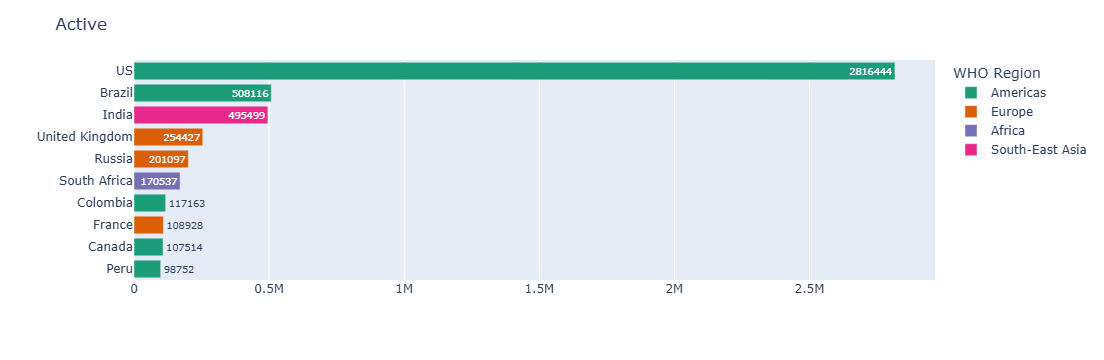

In [111]:
plot_hbar(country_wise, 'Active', 10,['Deaths','Recovered'])

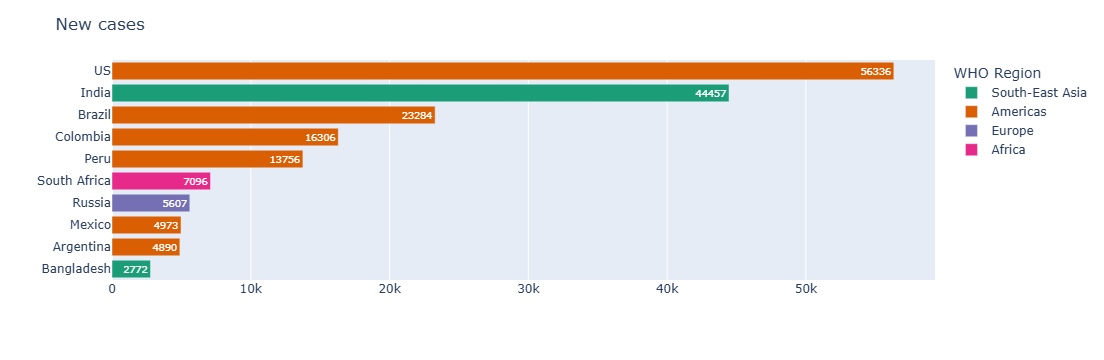

In [114]:
plot_hbar(country_wise, 'New cases', 10,['Deaths','Recovered'])

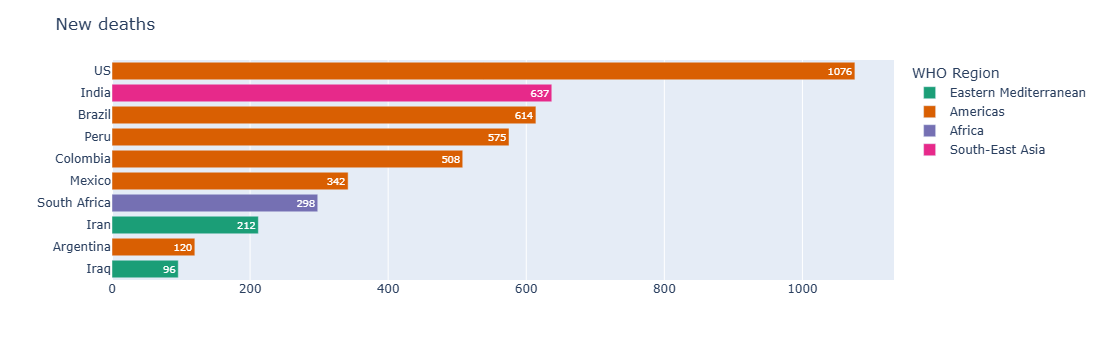

In [115]:
plot_hbar(country_wise, 'New deaths', 10,['Deaths','Recovered'])

In [116]:
#worldometer data

In [119]:
def plot_hbar_wm(col, n, min_pop=1000000, sort='descending'):
    df = worldometer[worldometer['Population']>min_pop]
    df = df.sort_values(col, ascending=True).tail(n)
    fig = px.bar(df,
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, 
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col+' (Only countries with > 1M Pop)', 
                      xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

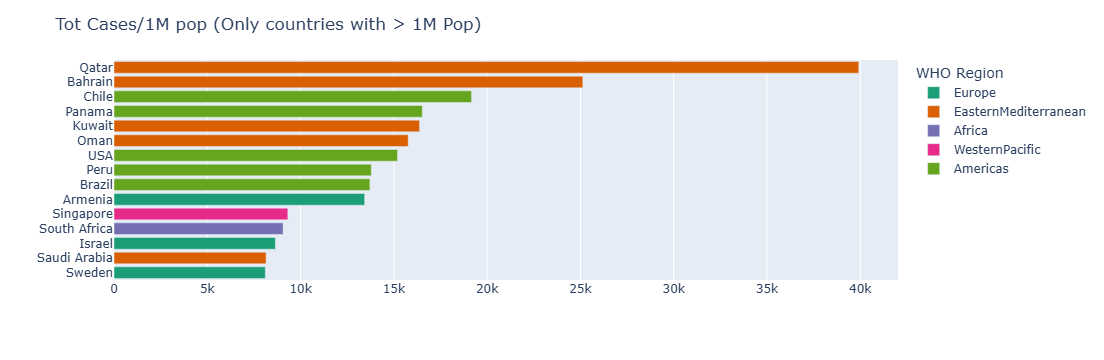

In [120]:
plot_hbar_wm('Tot Cases/1M pop', 15, 1000000)

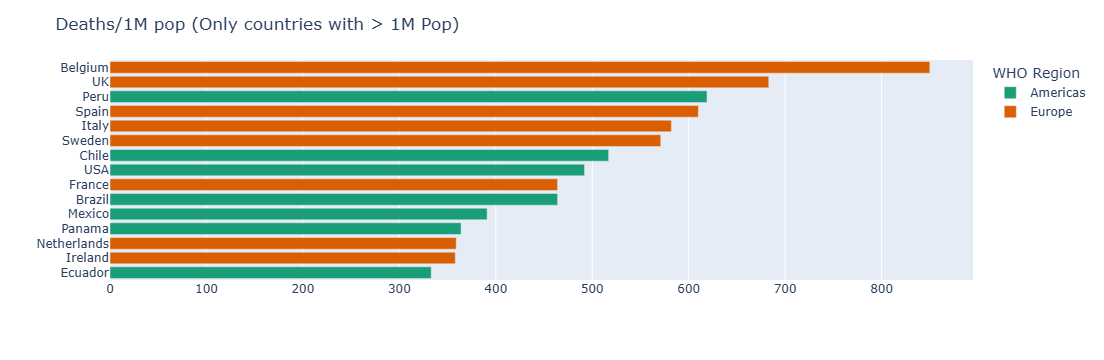

In [121]:

plot_hbar_wm('Deaths/1M pop', 15, 1000000)

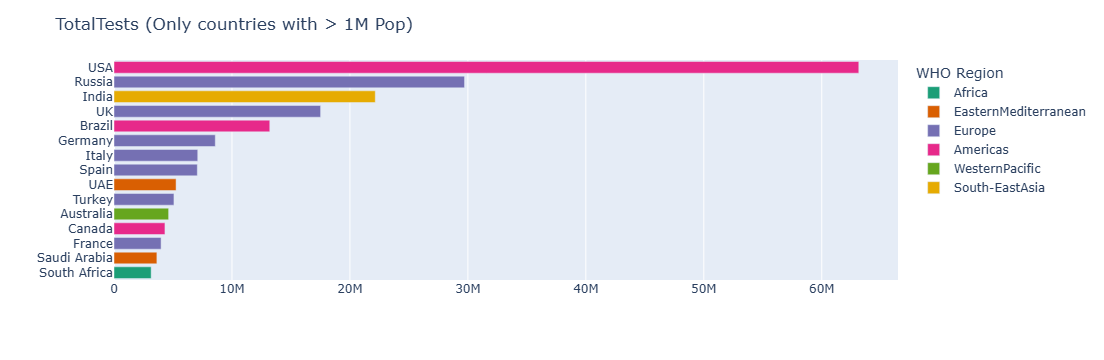

In [122]:
plot_hbar_wm('TotalTests', 15, 1000000)

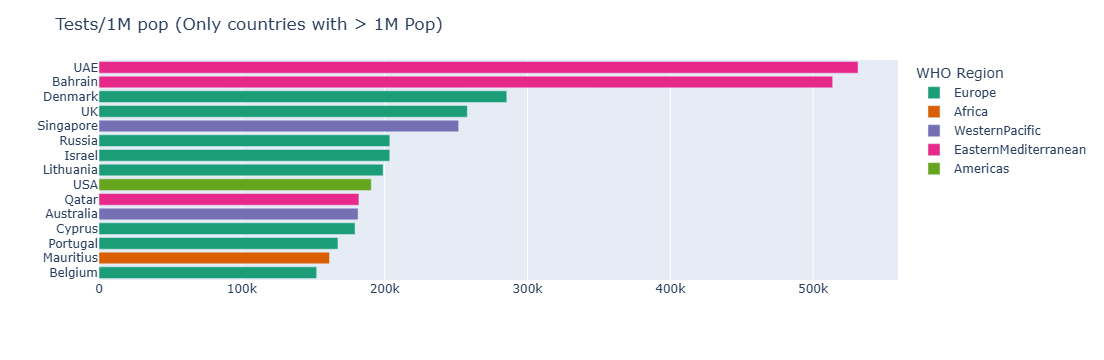

In [123]:
plot_hbar_wm('Tests/1M pop', 15)

USA